#                       Mexico's COVID19 Data description and Analisys


<img align="center" src="https://i.imgur.com/ywPyXHY.png">


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import seaborn as sns
from datetime import datetime, timedelta
from collections import OrderedDict

# Data helper modules
from Covid_suite import Covid
from constants import *

In [2]:
database = {'confirmed'   : 'Casos_Diarios_Estado_Nacional_Confirmados_20200603.csv',
            'suspicious'  : 'Casos_Diarios_Estado_Nacional_Sospechosos_20200603.csv',
            'negatives'   : 'Casos_Diarios_Estado_Nacional_Negativos_20200603.csv',
            'deaths'      : 'Casos_Diarios_Estado_Nacional_Defunciones_20200603.csv',
            'patients'    : '200603COVID19MEXICO.csv'}
# Update the database by writing the url of the csv's and running the update_data @classmethod:
Covid.update_data(database)

# 1.- Frequencies

## Confirmed, Deaths, Negative and Suspicious in Mexico

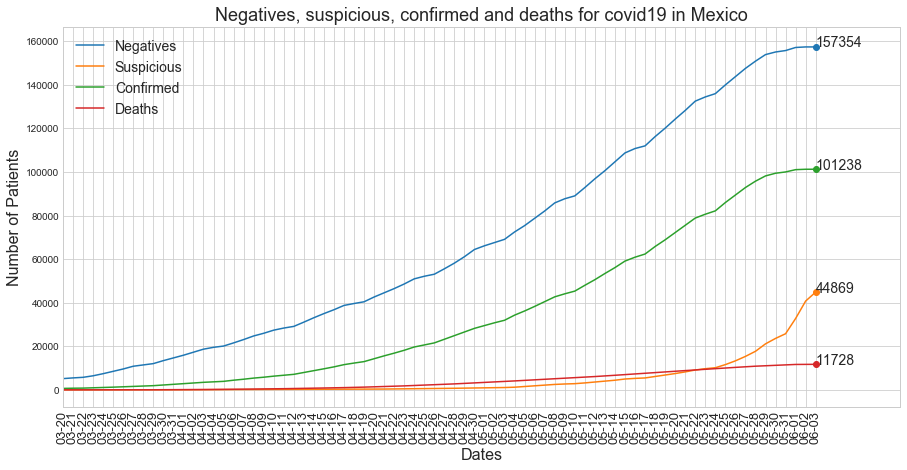

In [3]:
Covid.plot_cummulative(data  = [Covid('all').cummulative('negatives'),
                                Covid('all').cummulative('suspicious'),
                                Covid('all').cummulative('confirmed'),
                                Covid('all').cummulative('deaths')],
                                names = ['Negatives','Suspicious','Confirmed','Deaths'],
                                title = 'Negatives, suspicious, confirmed and deaths for covid19 in Mexico',
                                trim= 80)

## Confirmed and Suspicious by day in Mexico

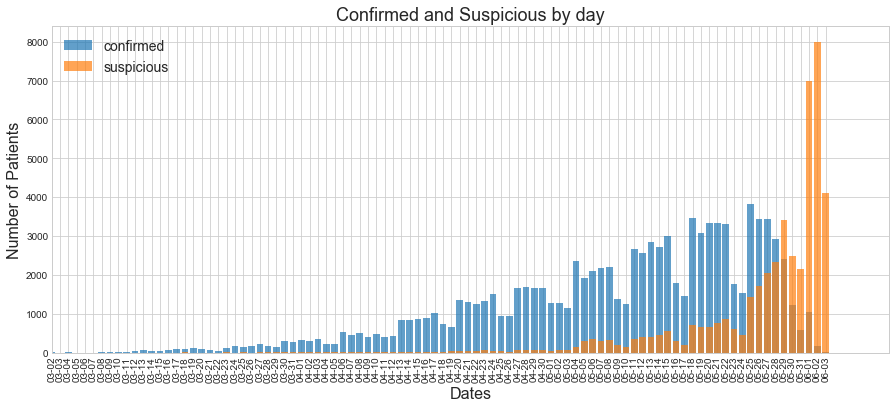

In [4]:
Covid.plot_discrete(data=[Covid('all').discrete('confirmed'),
                          Covid('all').discrete('suspicious')],
                    names=['confirmed','suspicious'],
                    title= 'Confirmed and Suspicious by day',
                    trim = 50)

## Deaths by day in Mexico

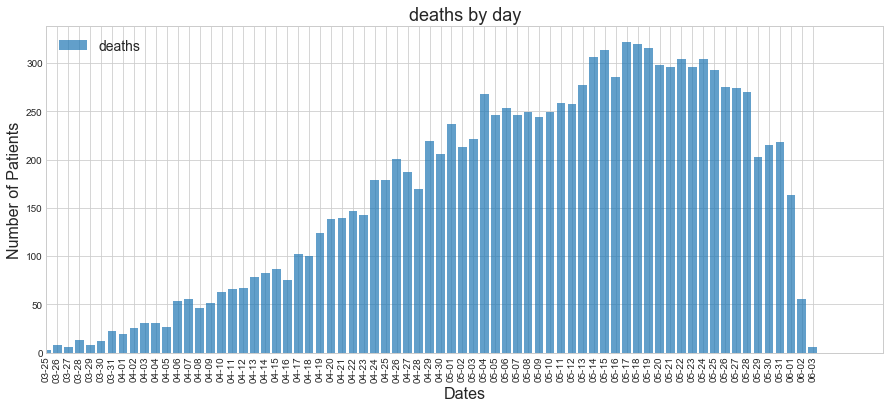

In [5]:
Covid.plot_discrete(data=Covid('all').discrete('deaths'),
                    names='deaths',
                    title= 'deaths by day',
                    trim = 50)

## States with more Confirmed patients

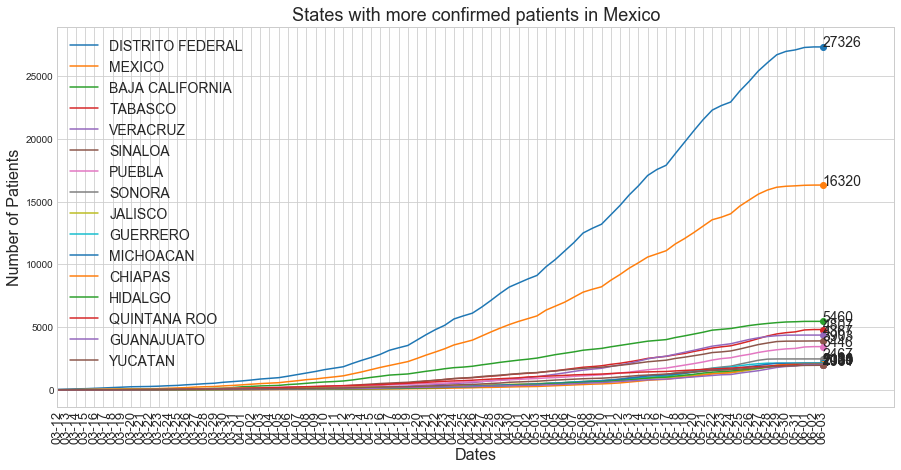

In [6]:
Covid.plot_max_to_min('confirmed',n=16,title='States with more confirmed patients in Mexico',trim=60)

## States with more Deceased patients

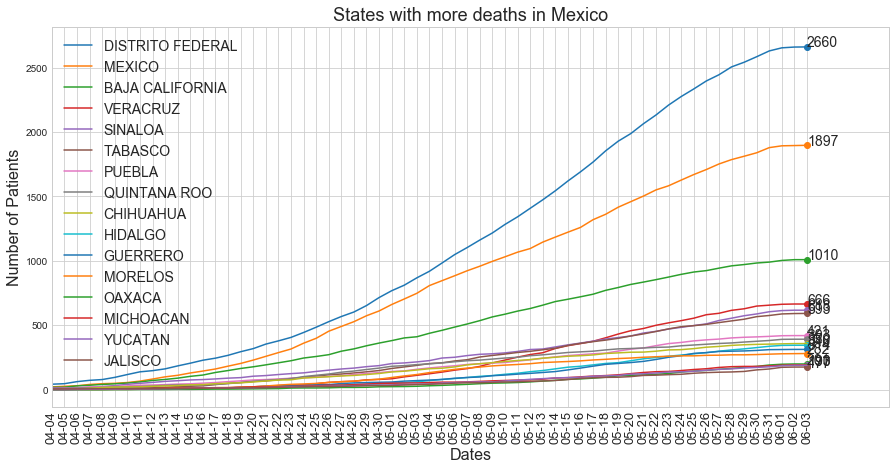

In [7]:
Covid.plot_max_to_min('deaths',n=16,title='States with more deaths in Mexico',trim=60)

## Active Patients in Mexico

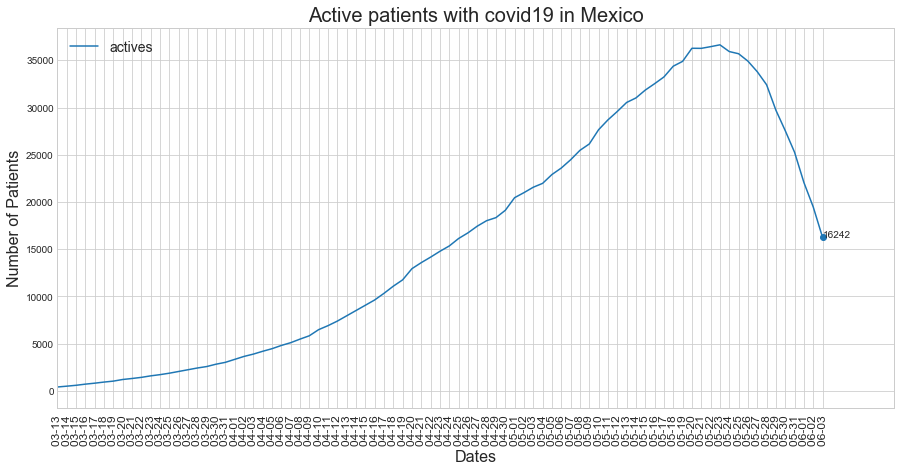

In [8]:
Covid.plot_actives(Covid('all').actives(),
                   names='actives',
                   title='Active patients with covid19 in Mexico',
                   trim=60)

## States with more active patients

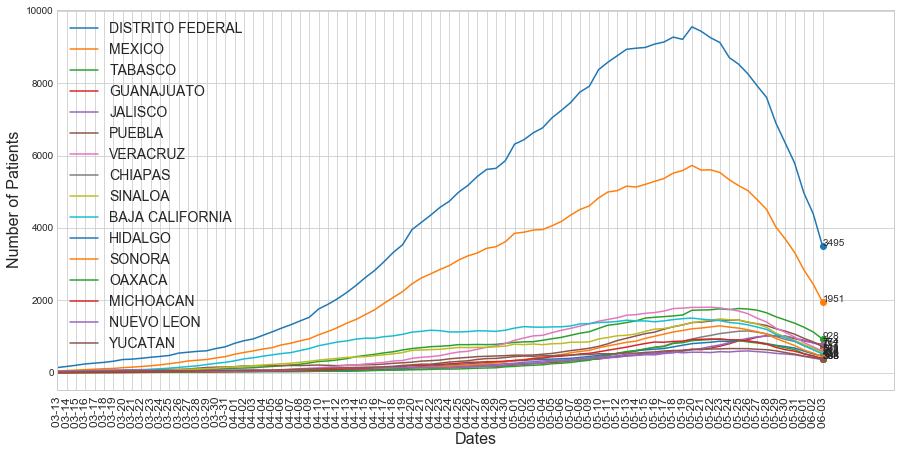

In [9]:
Covid.plot_max_to_min('actives',n=16,trim=60)

## States with less active patients

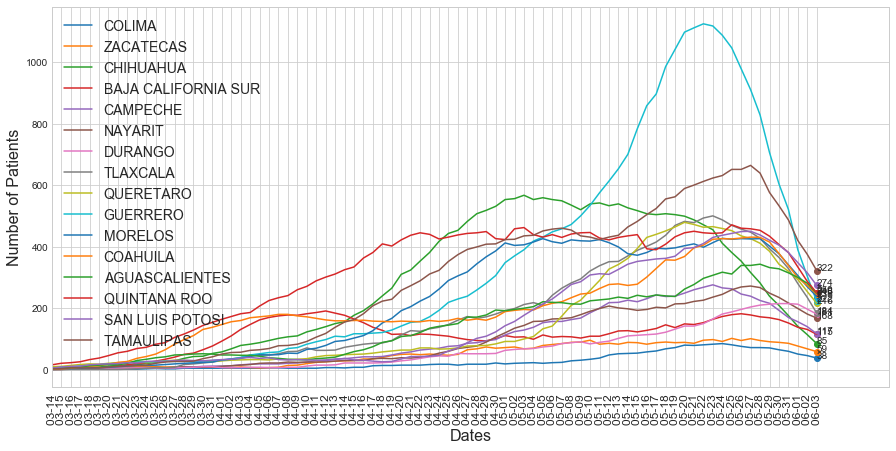

In [10]:
Covid.plot_max_to_min('actives', n=16, trim=60, max_to_min = False)

# 2.- Patients Data

### Institutions from where patients came from:

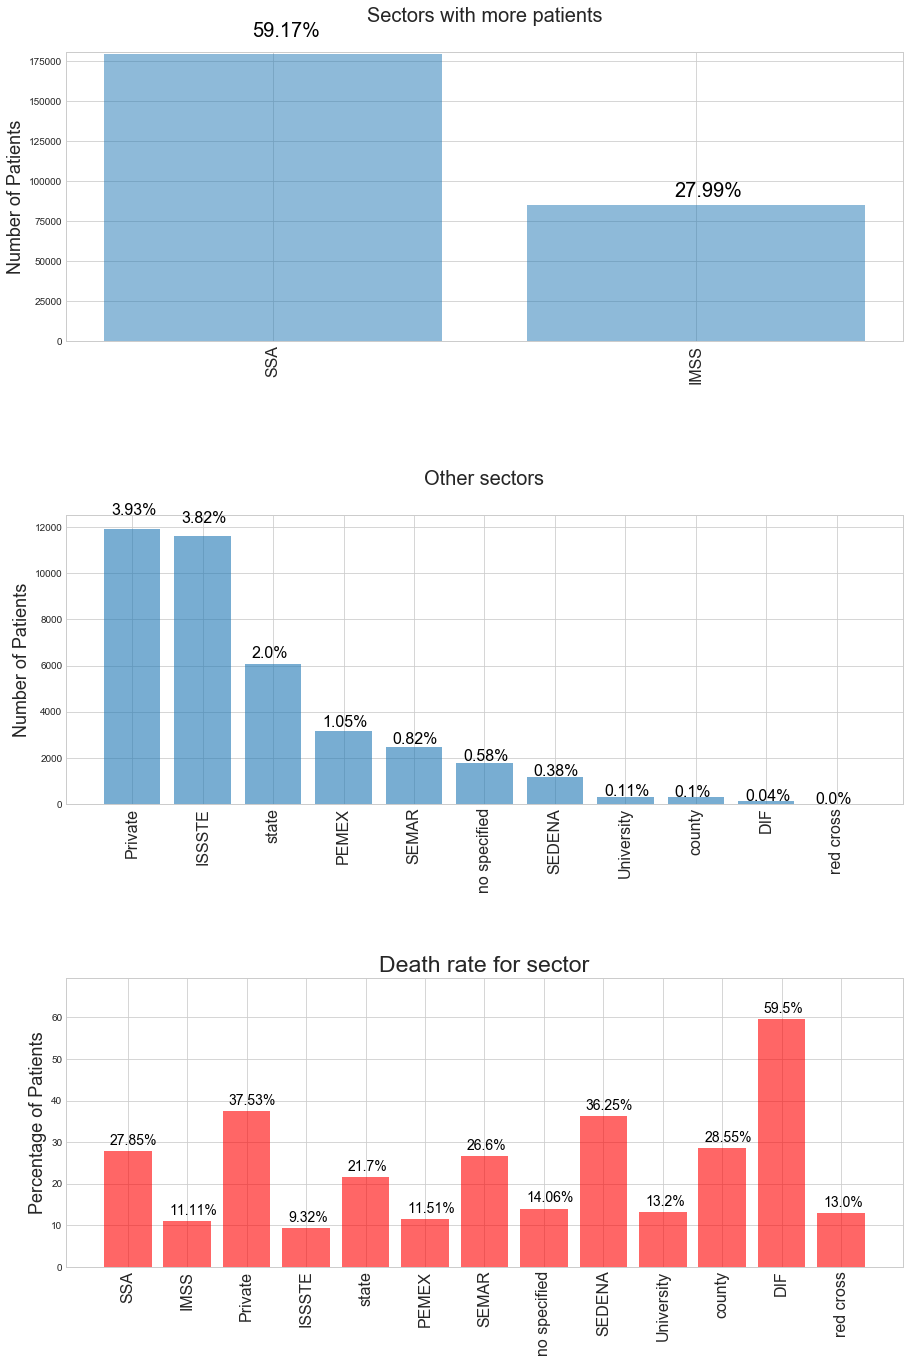

In [11]:
Covid('all').patients().sectors()

## Age for general population

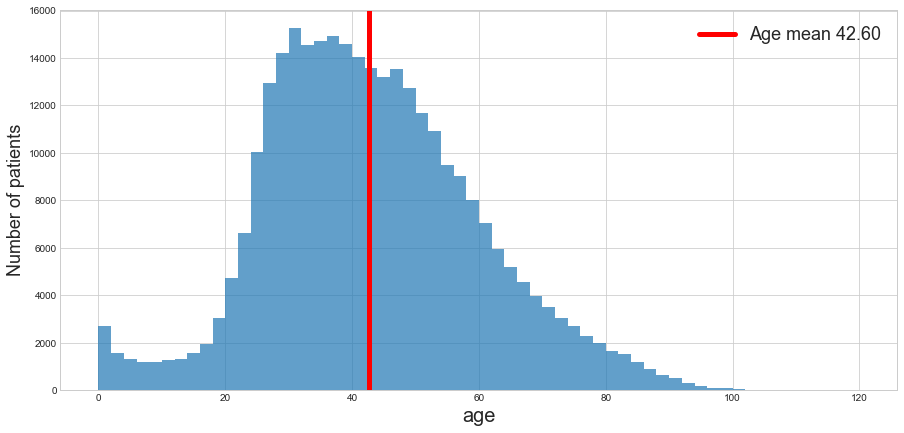

In [36]:
ages = Covid('all').patients().data.age.copy()

ages.hist(bins=60,alpha=0.7)
plt.axvline(np.mean(ages), 0, 160000, label= f'Age mean {str(np.mean(ages))[:5]}',color= 'r',linewidth = 5)
plt.ylabel('Number of patients',fontsize=18)
plt.xlabel('age',fontsize=20)
plt.legend(fontsize=18)
plt.show()

## Age for dead and alive patients

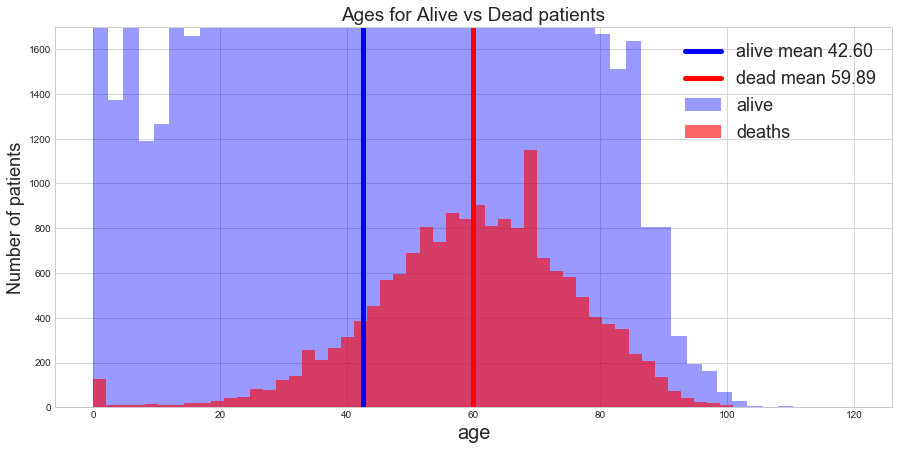

In [58]:
age_deaths = Covid('all').patients().deaths().data.age.copy()

ages.hist(bins = 50, alpha = 0.4, color = 'b',label='alive')
plt.axvline(np.mean(ages), 0, 160000, label= f'alive mean {str(np.mean(ages))[:5]}',color= 'b',linewidth = 5)

age_deaths.hist(bins = 50, alpha = 0.6, color = 'r',label='deaths')
plt.axvline(np.mean(age_deaths), 0, 160000, label= f'dead mean {str(np.mean(age_deaths))[:5]}',color= 'r',linewidth = 5)

plt.ylabel('Number of patients',fontsize=18)
plt.xlabel('age',fontsize=20)
plt.ylim(0,1700)
plt.title('Ages for Alive vs Dead patients', fontsize= 19)
plt.legend(fontsize=18)
plt.show()

## Sex frequency

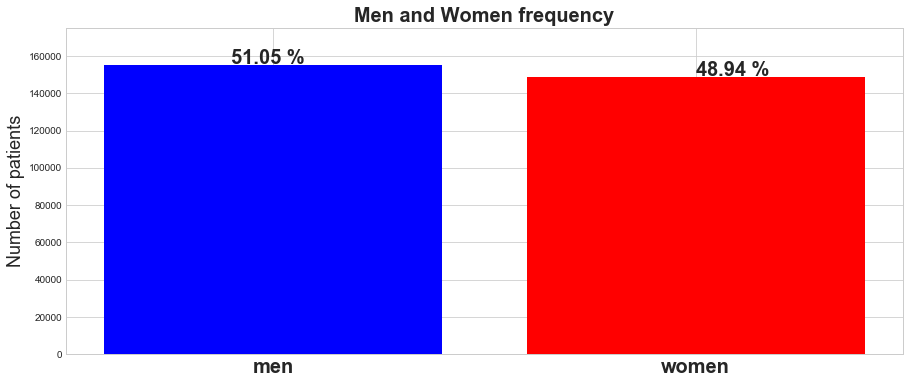

In [12]:
men  = Covid('all').patients().men().data
women= Covid('all').patients().women().data

plt.close('all')
plt.rcParams["figure.figsize"] = (15,6)

plt.bar(['men','women'],[len(men),len(women)],color=['b','r'])

plt.text(1,len(women)+1000,str((len(women)/len(Covid('all').patients().data))*100)[:5]+' %',fontsize=20, fontweight='bold')
plt.text(-0.1,len(men)+1000,str((len(men)/len(Covid('all').patients().data))*100)[:5]+' %',fontsize=20, fontweight='bold')

plt.ylabel('Number of patients', fontsize = 18)
plt.ylim(0,len(men)+20000)
plt.title('Men and Women frequency', fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.show()

## Women and Men Ages

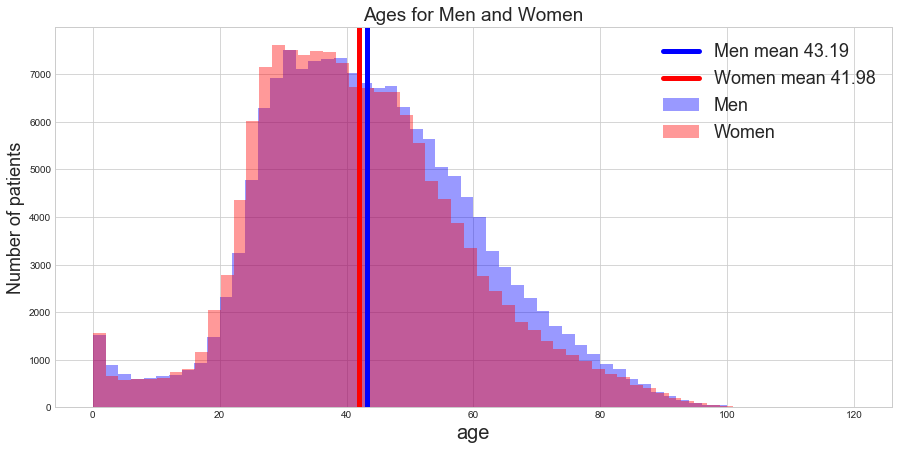

In [70]:
men.age.hist(bins = 60, alpha = 0.4, color = 'b',label='Men')
plt.axvline(np.mean(men.age), 0, 160000, label= f'Men mean {str(np.mean(men.age))[:5]}',color= 'b',linewidth = 5)

women.age.hist(bins = 57, alpha = 0.4, color = 'r',label='Women')
plt.axvline(np.mean(women.age), 0, 160000, label= f'Women mean {str(np.mean(women.age))[:5]}',color= 'r',linewidth = 5)

plt.ylabel('Number of patients',fontsize=18)
plt.xlabel('age',fontsize=20)
# plt.ylim(0,1700)
plt.title('Ages for Men and Women', fontsize= 19)
plt.legend(fontsize=18)
plt.show()

## Men and Women active infections

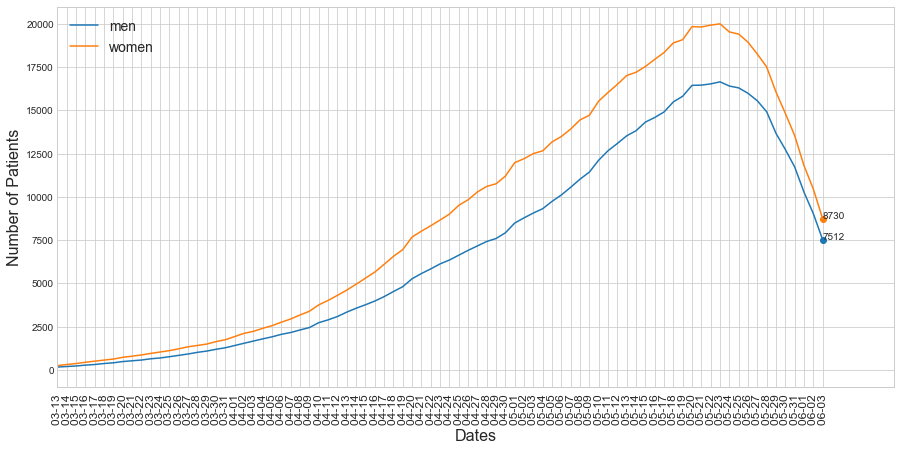

In [20]:
men_active   = Covid('all').patients().women().actives()
women_active = Covid('all').patients().men().actives()

Covid.plot_actives(data  = [men_active, women_active],
                   names = ['men','women'],
                   trim = 60)

In [ ]:
plt_actives([men_active,women_active] ,['Men','Women'], trim=60)

### Plotting Age for general population

In [ ]:
patient_data['age'].hist(bins=60)
plt.axvline(x=patient_data['age'].mean(),linewidth=4, color='r',label=f'Mean Age: {int(patient_data["age"].mean())}')
plt.title('Age frequency for general population',fontsize=20)
plt.xlim(0,100)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

###  Plotting Men and Women Proportion

In [ ]:
plt.close('all')
labels = 'Men', 'Women'
sizes = [len(men),len(women)]
colors = ['b', 'r']

plt.pie(sizes,labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140,
        textprops={'fontsize': 20,'color':'white','weight':'bold'},
       shadow=True)

plt.title(f'Men and Women proportion',fontsize=20)
plt.legend(fontsize=20)
plt.axis('equal')
plt.show();

### Plotting Man and Women Age frequency

In [ ]:
men.age.hist(bins=60,alpha=0.4,label='Men',color='b')
plt.axvline(x=men.age.mean(),linewidth=4, color='b',label=f'Mean Age fo Men: {int(men["age"].mean())}')
women.age.hist(bins=60,alpha=0.4,label='Women',color='r')
plt.axvline(x=women.age.mean(),linewidth=4, color='r',label=f'Mean Age fo Women: {int(women["age"].mean())}')

plt.title('Age frequency for men and women',fontsize=20)
plt.xlim(0,100)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

### Plotting Deceased Age frequency

In [ ]:
plt.close('all')
deceased['age'].hist(bins=60)
plt.axvline(x=deceased['age'].mean(),linewidth=4, color='r',label=f'Mean Age: {int(deceased["age"].mean())}')

plt.title('Deceased Age frequency for general Population',fontsize=20)
plt.xlim(0,100)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

### Plotting Alive vs Deceased Age frequency

In [ ]:
plt.close('all')

alive['age'].hist(bins=80,alpha=0.5)
plt.axvline(x=alive['age'].mean(),linewidth=4, color='b',label=f'Mean Alive Age: {int(alive["age"].mean())}')

deceased['age'].hist(bins=60,color='r')
plt.axvline(x=deceased['age'].mean(),linewidth=4, color='r',label=f'Mean Deceased Age: {int(deceased["age"].mean())}')

plt.title('Alive vs Deceased Age frequency for general Population',fontsize=20)
plt.xlim(0,100)
plt.ylim(0,1500)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

###  Plotting Woman vs Men Decease Age

In [ ]:
plt.close('all')

men_deceased['age'].hist(bins=110,alpha=0.5)
plt.axvline(x=men_deceased['age'].mean(),linewidth=4, color='b',label=f'Mean for men Deceased Age: {int(men_deceased["age"].mean())}')

women_deceased['age'].hist(bins=100,color='r',alpha=0.5)
plt.axvline(x=women_deceased['age'].mean(),linewidth=4, color='r',label=f'Mean for Woman Deceased Age: {int(women_deceased["age"].mean())}')

plt.title('Men vs Woman Deceased Age frequency for general Population',fontsize=20)
plt.xlim(0,100)
plt.ylim(0,200)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.show();

###  Probaility Density for women and men decease

In [ ]:
plt.close('all')
sns.kdeplot(men_deceased['age'], label='MEN',shade = True)
sns.kdeplot(women_deceased['age'],label = 'WOMEN',shade= True)
plt.show()

### Checking if there are significative differences between the two samples

In [ ]:
# T test for independen samples, to see if the two distributions are the same
from scipy.stats import ttest_ind
# Implements Cohens Difference to see how far away are the two samples
from data_helpers import cohens_d

_, pv = ttest_ind(men_deceased['age'], women_deceased['age'])

if pv < 0.01:
    print(f'The two samples are distinct, alpha = {pv}')
else:
    print('There is not difference between samples')

difference_between_samples = round(cohens_d(men_deceased['age'], women_deceased['age']),2)

print(f'Men are {difference_between_samples} stds away from Women')


## Proportion of deaths by age filtered by sex

### Getting the Histogram data

In [ ]:
# This function takes an array of ages and outputs a dictionary for plotting an histogram:
# get_age_bins(data,bin_size)
from data_helpers import get_age_bins

ages_freq_dead_men = get_age_bins(men_deceased, bin_size = 5)
ages_freq_dead_women = get_age_bins(women_deceased, bin_size = 5)
age_freq_men = get_age_bins(men, bin_size = 5)
age_freq_women = get_age_bins(women, bin_size = 5)

### Calculating the proportions

In [ ]:
# This function takes the histogram for general population and the filtered one,
# returns an histogram with proportion of the filtered data in relation to the general population
# get_proportions(filtered_histogram, general_patients_histogram)
from data_helpers import get_proportions

death_proportions_men = get_proportions(ages_freq_dead_men, age_freq_men)
death_proportions_women = get_proportions(ages_freq_dead_women, age_freq_women)

## Plotting proportion of deaths by age (men and women)

In [ ]:
plt.close('all')
fig, axs = plt.subplots(2,figsize=(16,10))
plt.subplots_adjust(hspace=0.5) 

axs[0].bar(list(death_proportions_men.keys()),list(death_proportions_men.values()))
axs[0].set_ylabel('% Percentage of all patients', fontsize = 16)
axs[0].set_title('Men Proportions of death by age',fontsize=20)
for i in range(23):
    value = round(list(death_proportions_men.values())[i],2)
    if value == 0:
        continue
    else:
        axs[0].text(i-0.3, value + 1, str(value), color='black', fontweight='bold')

axs[1].bar(list(death_proportions_women.keys()),list(death_proportions_women.values()),color='r',alpha=0.5)
axs[1].set_ylim(0,25)
axs[1].set_title('Women Proportions of death by age',fontsize=20)
axs[1].set_ylabel('% Percentage of all patients', fontsize = 16)
axs[1].set_xlim(0,23)
for i in range(23):
    value = round(list(death_proportions_women.values())[i],2)
    if value == 0:
        continue
    else:
        axs[1].text(i-0.3, value + 1, str(value), color='black', fontweight='bold')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90,fontsize=14)
plt.show()

## Exploring the frequency of Ilness in deceased vs alive patients

### Generating subsets of data

In [ ]:
deceased_illness = deceased[['pneumonia','diabetes', 'copd', 'asthma','intubated',
                               'immunosuppression', 'hypertension',
                               'cardiovascular', 'obesity', 'kidney_disease',
                               'smoker','sex']]
alive_illness = alive[['pneumonia','diabetes', 'copd', 'asthma','intubated',
                               'immunosuppression', 'hypertension',
                               'cardiovascular', 'obesity', 'kidney_disease',
                               'smoker','sex']]
man_deceased_illness   = deceased_illness[deceased_illness['sex']==1]
woman_deceased_illness = deceased_illness[deceased_illness['sex']==2]
alive_man_illness      = alive_illness[alive_illness['sex']==1]
alive_woman_illness    = alive_illness[alive_illness['sex']==2]

man_deceased_illness   = man_deceased_illness.drop('sex',axis = 1).replace([97,98,99],2)
woman_deceased_illness = woman_deceased_illness.drop('sex',axis = 1).replace([97,98,99],2)
alive_man_illness      = alive_man_illness.drop('sex',axis = 1).replace([97,98,99],2)
alive_woman_illness    = alive_woman_illness.drop('sex',axis = 1).replace([97,98,99],2)
deceased_illness = deceased_illness.drop('sex',axis = 1).replace([97,98,99],2)
alive_illness = alive_illness.drop('sex',axis = 1).replace([97,98,99],2)



## Younger dead patients

In [ ]:
younger_40 = patient_data[patient_data['result']==1]

In [ ]:
younger_40 = patient_data[patient_data['day_of_death']!='9999-99-99']

In [ ]:
younger_40 = younger_40[['pneumonia','diabetes', 'copd', 'asthma',
                               'immunosuppression', 'hypertension',
                               'cardiovascular', 'obesity', 'kidney_disease',
                               'smoker']]

In [ ]:
younger_40

In [ ]:
patient_data_keys('result')

### Man Proportions of Ilness, deceased vs Alive

In [ ]:
from data_helpers import get_illness_proportions

In [ ]:
mdp = get_illness_proportions(man_deceased_illness)
wdp = get_illness_proportions(woman_deceased_illness)
malp = get_illness_proportions(alive_man_illness)
walp = get_illness_proportions(alive_woman_illness)
younger = get_illness_proportions(younger_40)

## Man alive vs dead illness proportion

In [ ]:
plt.close('all')
plt.bar(list(younger.keys()),list(younger.values()), label = 'younger Men', color ='r')

for ind, i in enumerate(younger.keys()):
    plt.text(ind-0.2, younger[i] + 1, str(round(younger[i],2)), color='black', fontweight='bold',fontsize=14)
    
plt.xticks(rotation=90,fontsize=16)
plt.legend(fontsize=15)
plt.show()

In [ ]:
plt.close('all')
plt.bar(list(mdp.keys()),list(mdp.values()), label = 'Deceased Men', color ='r')
plt.bar(list(mdp.keys()),list(malp.values()), label = 'Alive Men', color ='b')


for ind, i in enumerate(mdp.keys()):
    plt.text(ind-0.2, mdp[i] + 1, str(round(mdp[i],2)), color='black', fontweight='bold',fontsize=14)
    
plt.xticks(rotation=90,fontsize=16)
plt.legend(fontsize=15)
plt.show()

## Women alive vs dead illness proportion

In [ ]:
plt.close('all')
plt.bar(list(wdp.keys()),list(wdp.values()), label = 'Deceased Women', color ='r')
plt.bar(list(wdp.keys()),list(walp.values()), label = 'Alive Women', color ='b')


for ind, i in enumerate(wdp.keys()):
    plt.text(ind-0.2, wdp[i] + 1, str(round(wdp[i],2)), color='black', fontweight='bold',fontsize=14)
    
plt.xticks(rotation=90,fontsize=16)
plt.legend(fontsize=15)
plt.show()

In [ ]:
stoping the flow so the next does not run

In [ ]:
patient_data_keys('sex')

In [ ]:
deceased_illness = deceased[['diabetes', 'copd', 'asthma',
                               'immunosuppression', 'hypertension',
                               'cardiovascular', 'obesity', 'kidney_disease',
                               'smoker']]
alive_illness = alive[['diabetes', 'copd', 'asthma',
                               'immunosuppression', 'hypertension',
                               'cardiovascular', 'obesity', 'kidney_disease',
                               'smoker']]

deceased_illness = deceased_illness.replace(2,0)
alive_illness = alive_illness.replace(2,0)

y_deceased = np.ones(len(deceased_illness))
y_alive = np.zeros(len(alive_illness))

deceased_illness['result'] = y_deceased

alive_illness['result'] = y_alive

all_data = pd.concat([deceased_illness,alive_illness])

y = all_data['result']

all_data = all_data.drop('result',axis=1)


In [ ]:
all_data

In [ ]:
all_data

# Selecting Feature importance

In [ ]:
X = all_data
y = y

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import load_digits, make_regression, make_classification
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance

### SVC

In [ ]:
# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)
#ranking = rfe.ranking_.reshape(digits.images[0].shape)
# Plot pixel ranking
plt.bar(range(0,len(rfe.ranking_)),rfe.ranking_)
plt.title("Ranking of pixels with RFE")
plt.xticks(range(0,len(rfe.ranking_)),all_data.keys(),rotation=90, fontsize=16)
plt.show()

In [ ]:
X.keys()

## Linear Regression

In [ ]:
LinReg_model = LinearRegression()
# fit the model
LinReg_model.fit(X_train, y_train)
# get importance
importance = LinReg_model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],all_data.keys(),rotation=90, fontsize=16)
plt.show()

## Logistic Regression

In [ ]:
LogReg_model = LogisticRegression()
# fit the model
LogReg_model.fit(X_train, y_train)
# get importance
importance = LogReg_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

## Descicion Tree

In [ ]:
DesTree_model = DecisionTreeRegressor()
# fit the model
DesTree_model.fit(X_train, y_train)
# get importance
importance = DesTree_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

In [ ]:
X.keys()

In [ ]:
# define the model
DesTreeClass_model = DecisionTreeClassifier()
# fit the model
DesTreeClass_model.fit(X_train, y_train)
# get importance
importance = DesTreeClass_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

## RandomForest

In [ ]:
RanFoRe_model = RandomForestRegressor()
# fit the model
RanFoRe_model.fit(X_train, y_train)
# get importance
importance = RanFoRe_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

In [ ]:
X.keys()

In [ ]:
RFoClas_model = RandomForestClassifier()
# fit the model
RFoClas_model.fit(X_train, y_train)
# get importance
importance = RFoClas_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

## XGBRegressor

In [ ]:
XGBRe_model = XGBRegressor()
# fit the model
XGBRe_model.fit(X_train, y_train)
# get importance
importance = XGBRe_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

In [ ]:
XGBclass_model = XGBClassifier()
# fit the model
XGBclass_model.fit(X_train, y_train)
# get importance
importance = XGBclass_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))],X.keys(),rotation=90, fontsize=16)
plt.show()

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# plot feature importance
plot_importance(model)
pyplot.show()

## K Neighbord Regressor

In [ ]:
KNeiRe_model = KNeighborsRegressor()
# fit the model
KNeiRe_model.fit(X, y)


In [ ]:
# perform permutation importance
results = permutation_importance(KNeiRe_model, X, y, scoring='neg_mean_squared_error')


In [ ]:
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
KNClas_model = KNeighborsClassifier()
# fit the model
KNClas_model.fit(X, y)
# perform permutation importance
results = permutation_importance(KNClas_model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

## and make the ages a bins of one hot

## and close this already!!!!